In [3]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Inserisci i parametri
### average_yearly_return: profitto medio annuale in percentuale puoi anche inserire quello annuale scrivendo il numero su average_monthly_return
### month_deposit: quanto carichi ogni mese
### start_money: soldi iniziali

In [83]:
average_yearly_return=12
month_deposit=500
start_money=1000
average_monthly_return=average_yearly_return/12
number_of_years=20

In [84]:
def money_without_investing(month):
    return start_money+month_deposit*month
def money_with_investing(previous_money):
    return previous_money+month_deposit+(previous_money+month_deposit)*average_monthly_return/100

In [85]:
scenario=pd.DataFrame(columns=['Month','Money_without_investing','Money_with_investing'])
x = np.linspace(0, 12*number_of_years,12*number_of_years+1)
scenario['Month']=x.tolist()
scenario['Money_with_investing']=start_money
scenario['Money_without_investing']=scenario['Month'].apply(lambda row: money_without_investing(row))
for index, row in scenario.iterrows():
    if index == 0:
        continue
    else:
        scenario.at[index, 'Money_with_investing'] = money_with_investing(scenario.Money_with_investing[index-1])
scenario = scenario.drop('Month', axis=1)
scenario.index.name="month"
scenario['Money_with_investing']=scenario['Money_with_investing'].div(1000)
scenario['Money_without_investing']=scenario['Money_without_investing'].div(1000)
display(scenario)

,Money_without_investing,Money_with_investing
month,,
0,1.0,1.000000
1,1.5,1.515000
2,2.0,2.035150
3,2.5,2.560502
4,3.0,3.091107
...,...,...
236,119.0,488.577793
237,119.5,493.968571
238,120.0,499.413257


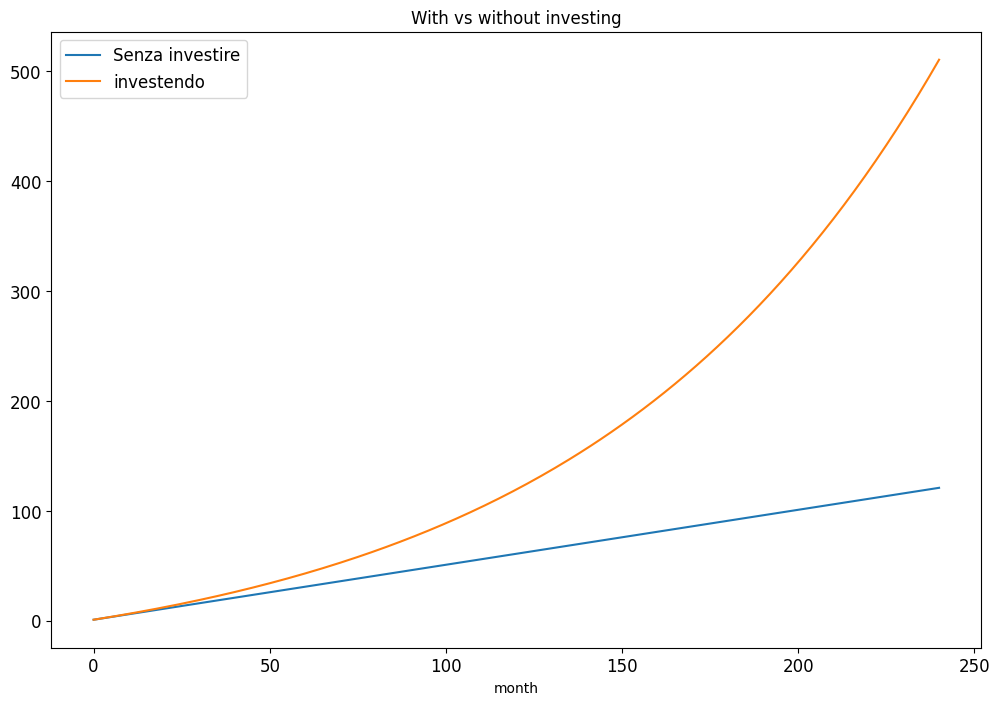

In [86]:
scenario['Money_without_investing'].plot(figsize = (12, 8), title = "With vs without investing",label="Senza investire", fontsize = 12)
scenario['Money_with_investing'].plot(figsize = (12, 8), title = "With vs without investing",label="investendo", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()